In [1]:
from pathlib import Path

import cv2
import matplotlib.pyplot as plt
import numpy as np
import pytesseract
from ipywidgets import interact

In [2]:
DATA_DIR = Path('..') / 'data'
SHEET_FEED = DATA_DIR / 'Sheetfeed'

IMAGE = str(SHEET_FEED / 'test0019.tif')


In [3]:
INCHES = 32


def show_image(image):

    fig, ax = plt.subplots(1, 1)

    ax.imshow(image, cmap='gray')
    ax.axis('off')

    fig.set_size_inches(INCHES, INCHES)
    plt.show()

(3321, 4467)


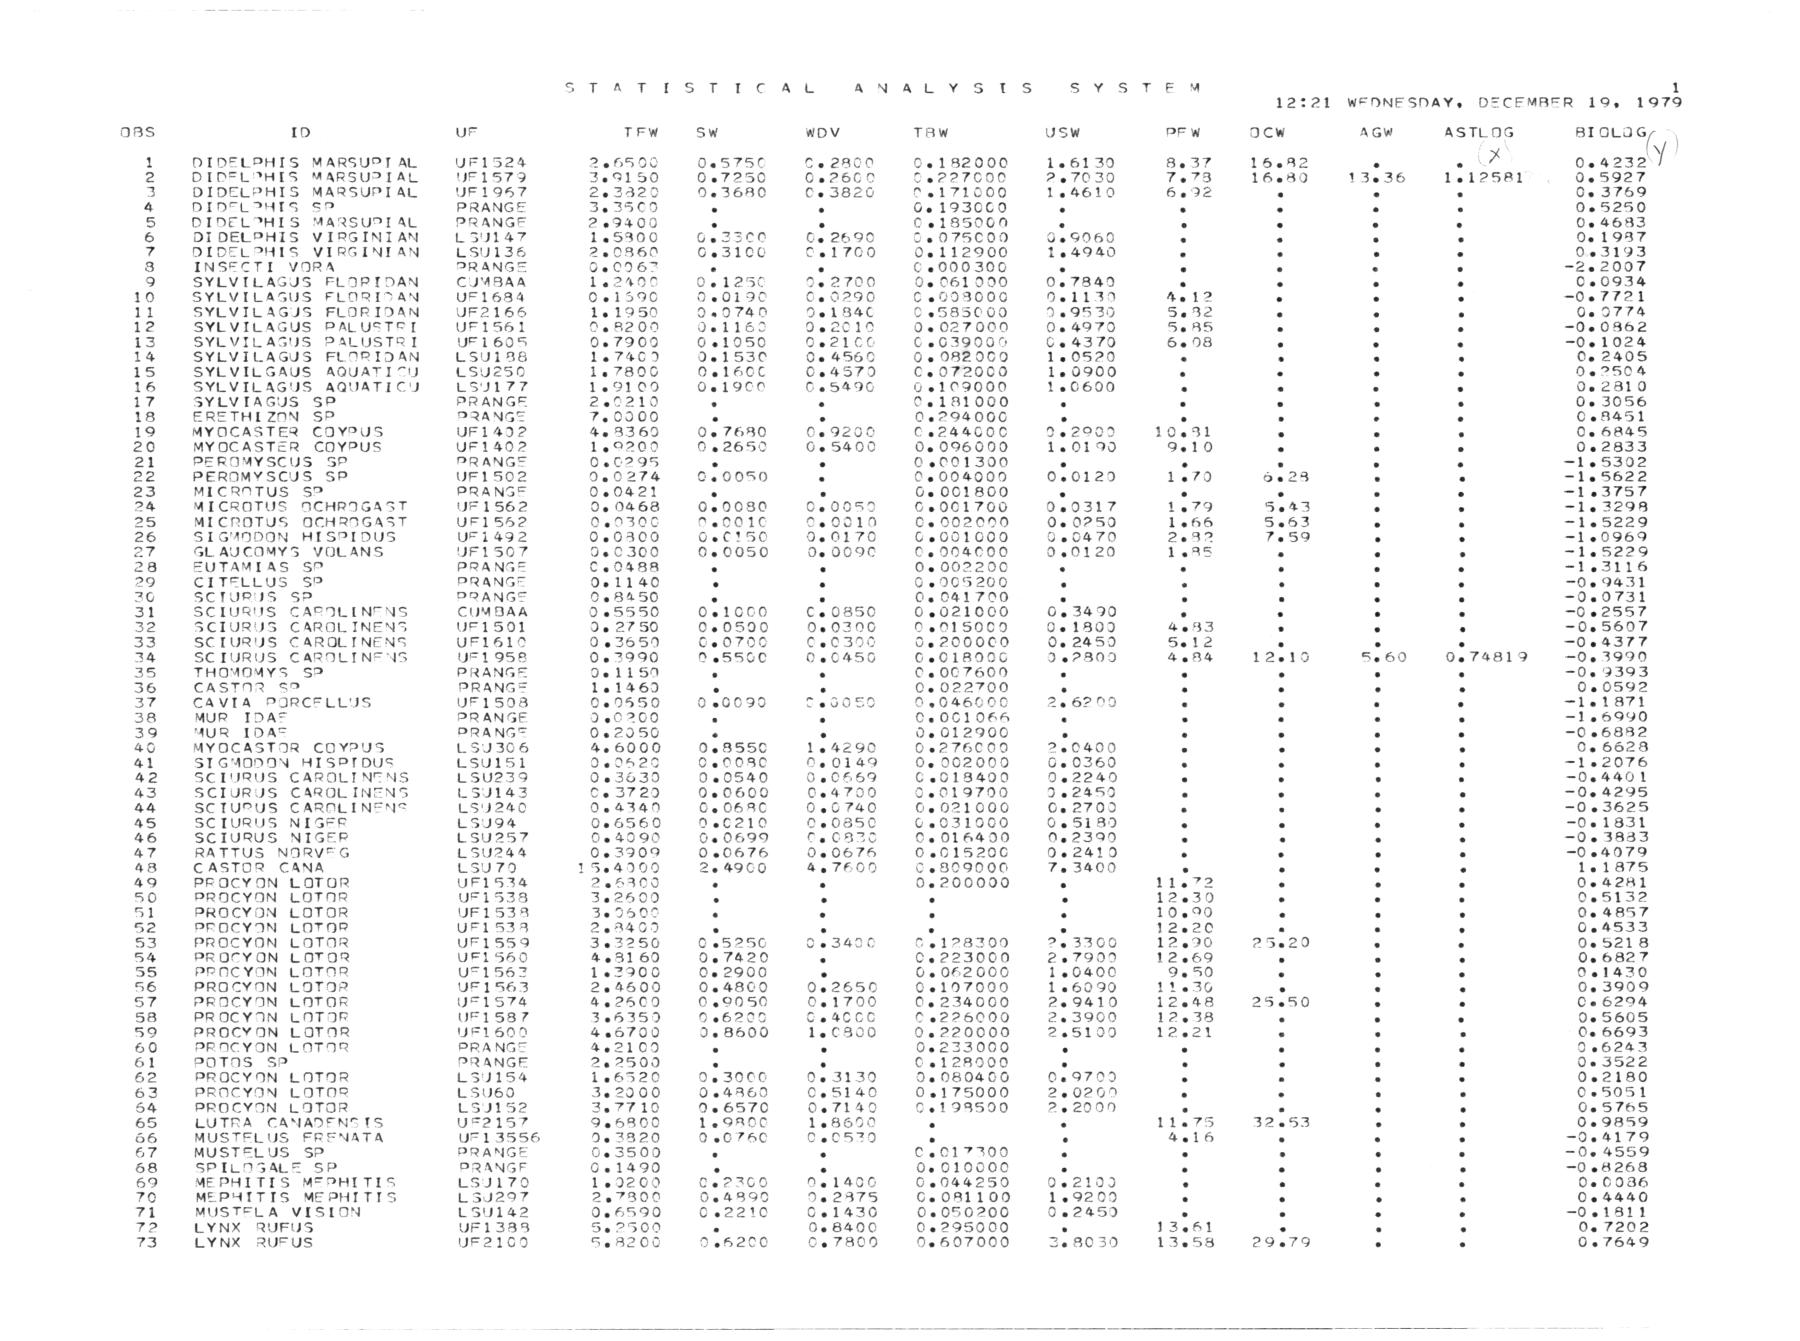

In [4]:
gray = cv2.imread(IMAGE, cv2.IMREAD_GRAYSCALE)
gray = cv2.rotate(gray, cv2.ROTATE_90_CLOCKWISE)

print(gray.shape)
show_image(gray)

In [5]:
ocr = pytesseract.image_to_string(gray, lang='eng', config='allometry.config')
print(ocr)

STA TFS TTtTCAL ANALY S Tt 5S SY S TEM 1

12221 WFONESDAY., DECEMBER 195 1979
OBS ID UF TFWw SW wOV TRW USW DFW o9CcWw AGW ASTLOG BIOLaG,

(VY!

1 DIDELPHIS MARSUST AL YF1I524 206590 0035750 Ce 2800 02182000 126139 Be 37 16282 . ° x o.azaa¥

2 DIDFLOHIS MARSUPTAL UFIS79 309150 007250 622609 0e227CO00 227030 7273 162389 13036 1212581 065927
3 DIDELPHIS MARSUPT AL UF1967 202320 923680 Ce 3826 2171000 1246190 6092 e © * Oe 3769
4 DIDTLPHTS sP PRANGE 323509 ° ° Ge i930C9 e ° ° ° ° 025250
5 DIDELPHIS MARSUPTAL PRANGE 209400 ° ° Ce185069 ° ° e ° ° 024633
6 DIDELPHIS VIRGINIAN LSIL47 1.5300 Ge2sctc Ce 2690 Ge2075C09 0290698 . ° ° . 001987
7 DIDELPHIS VIRGINIAN LSU136 220860 G6e3100 Cel 7090 02112900 124940 ° ° e . 023193
8 INSECTI VORA PRANGE GelI 62 * e 6 e000306 ° ° ° ° e —222007
9 SYLVTLAGUS FLOPIDAN CUMBAA 122400 021256 922700 Oe 061990 027849 ° ° ° ° 020934
10 SYLVILASGUS FLORITAN UF1634 021590 920190 600290 Ce593000 901139 4e12 ° ° . —“O407721
11 SYLVILAGJS FLORIDAN UF2166 161950 009745

In [11]:
kernel = np.ones((4, 4), np.uint8)

binary = None


def binarize(threshold):
    global binary
    print(threshold)

    # binary = cv2.threshold(gray, 0, threshold, cv2.THRESH_BINARY)[1]
#     binary = cv2.threshold(
#         gray, 0, threshold,
#         cv2.THRESH_OTSU)[1]

    binary = cv2.adaptiveThreshold(
        gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 21, 2)

    show_image(binary)


interact(binarize, threshold=(0, 255))

interactive(children=(IntSlider(value=127, description='threshold', max=255), Output()), _dom_classes=('widget…

<function __main__.binarize(threshold)>

In [7]:
ocr = pytesseract.image_to_string(binary, lang='eng', config='allometry.config')
print(ocr)

STATIS T TCAL ANALYST 5 SYS TEM 1
12221 WFONESDAY, DECEMBER 19, 1979

98S ID UF TFW SW WOV TBW usw PF Ww ocw AGW ASTLOG ere

\

1 DIDELPHIS MARSUPT AL UF1524 206500 0.5750 Ce 2nco 02182000 126130 Be 37 16082 e * LA 024232 y
2 DIDFELPHIS MARSUPIAL UF 1579 329150 07250 022669 G2.227CG00 27030 7278 16280 13036 1212581% ,. 065927
3 DIDELPHIS MARSUPTI AL UF1967 203320 9.3680 O02 3826 O2171500 124610 6292 * ° . Oe 3769
4 DIDELPHTS sp PRANGE 3.3500 ® * Oe 193060 e ° . . * 025250
5 DIDELPHIS MARSUPT AL PRANGE 229400 . ° 02185000 ° . ° ° . 0» 4683
6 DIDELPHIS VIRGINIAN LSUL47 1.25300 Os2500 Ge 2690 62075000 029060 ° * * . 0.1987
7 DIDELPHIS VIRGINIAN LSU136 220869 043100 Cel7G0 02112900 124940 e ° ° . 0.0 3193
3 INSECTE VORA PRANGE 040962 ® e 6 «000300 2 . ° * ° -222007
9 SYLVILAGUS FLORIDAN CUMBAA 162400 0.21250 022700 02 0619000 0.78490 * * e oe 020934
10 SYLVILAGUS FLORIDAN UF 1684 001590 920190 020290 C20983060 921130 heal? ° e 7 —~O0e7721
li SYLVILAGUS FLORIDAN UF2166 101950 0.0740 Geli 84

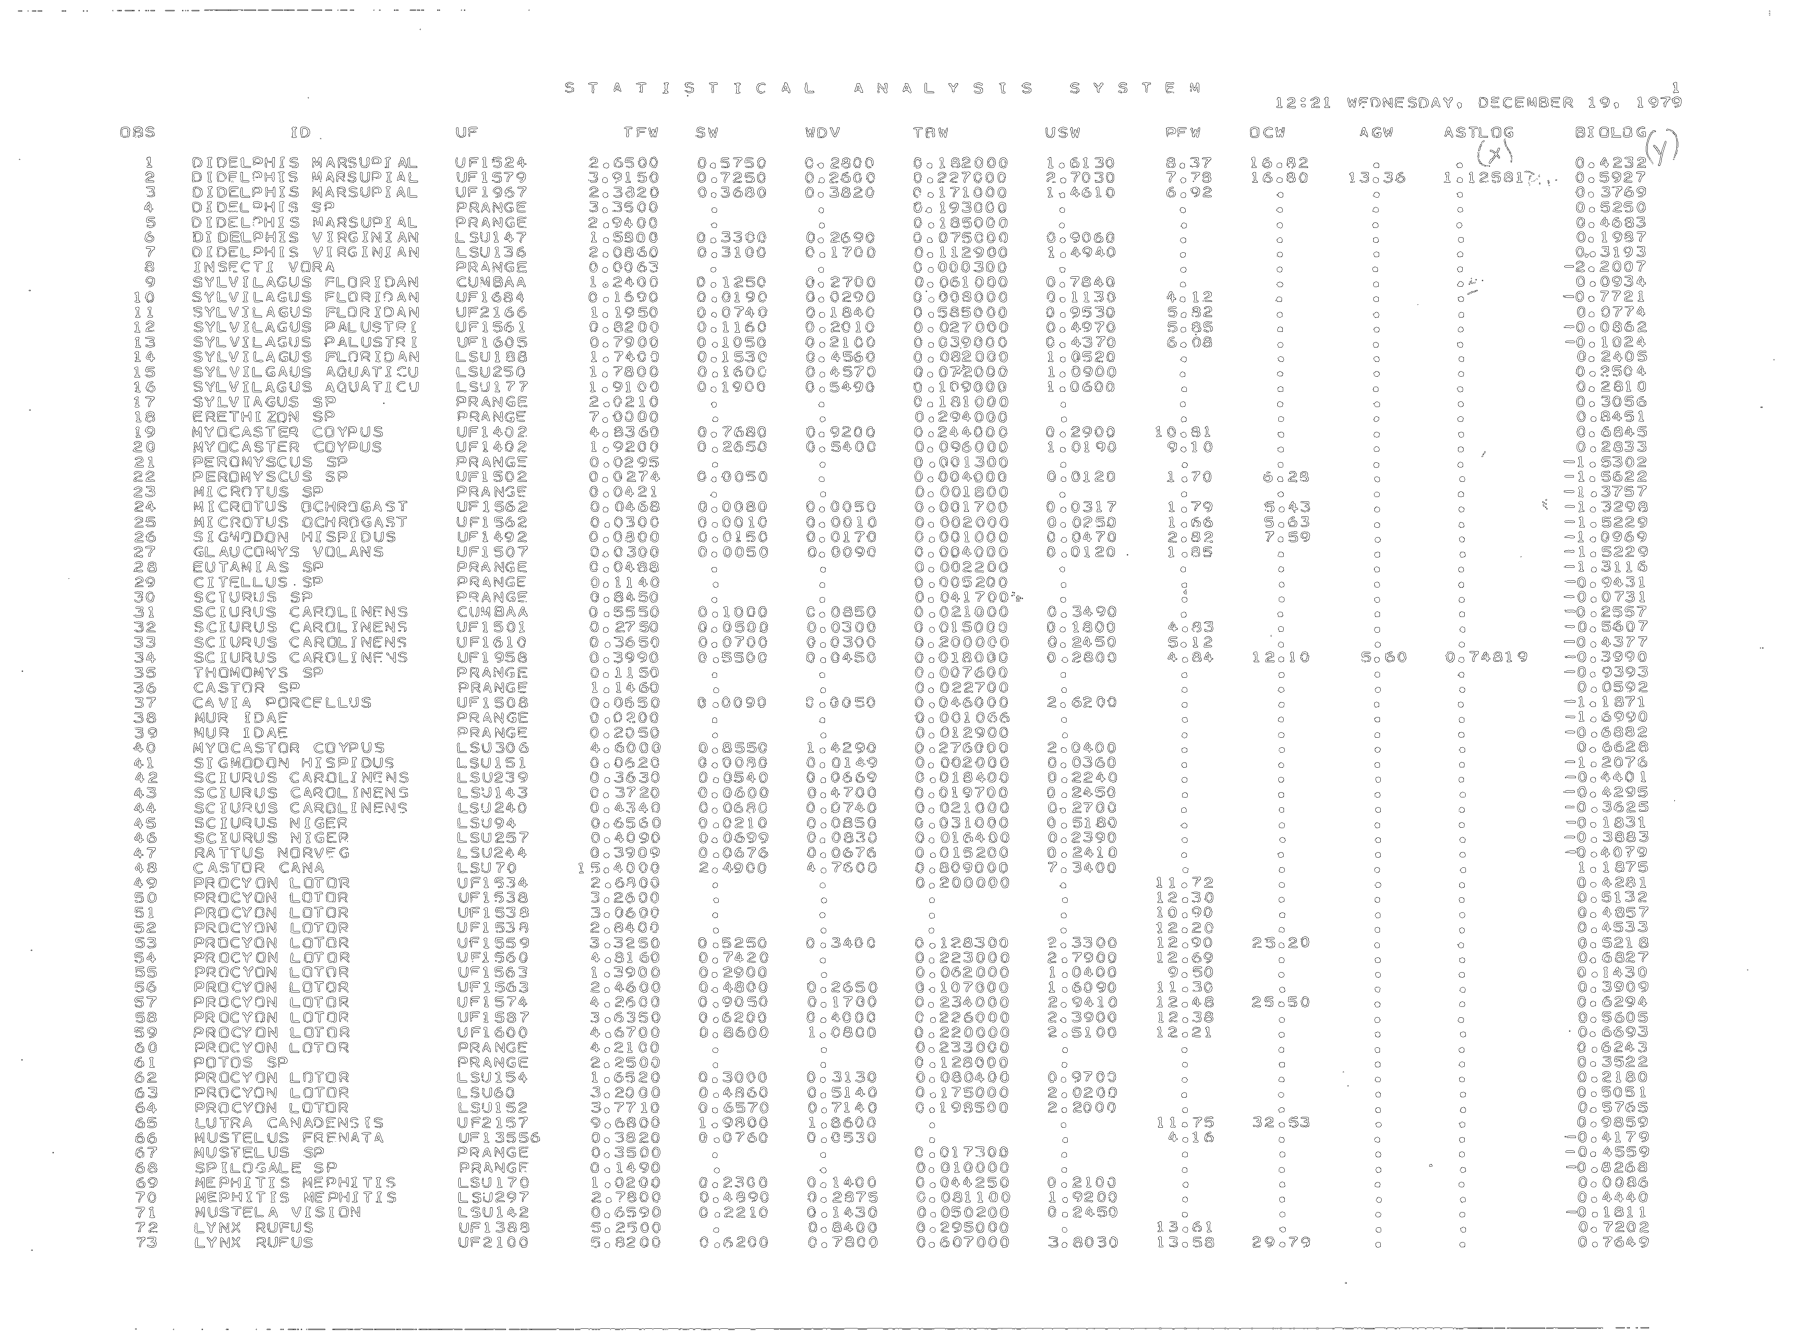

In [8]:
canny = cv2.Canny(binary, 60, 300)  
canny = cv2.bitwise_not(canny)
show_image(canny)

In [9]:
ocr = pytesseract.image_to_string(canny, lang='eng', config='allometry.config')
print(ocr)

 

 

STAT FI SF TC AL AN ALY S$ tS SY S YE M st
L282L WEDNESDAY. DECEMBER 195 1979

BBS tO, UF TEW SW WOV THAW USW PF W acw AGW AST Oe meres "}

Fah y}

i OLDELPHIS MARSUST AL UFPIS24 206508 Oo575G Go 2800 GolB2000 Lo GL 30 B03% LSoG82 ° ° oe 004232)
2 OLOPLEPATS MARSUPTAL UF iL S79 3091 50 007% 250 O©o2869 Co227?GO0O 2ofG@30 Vo%8 16080 13036 Loh2SOVE«,. OoS927
3 OXLDELPALS MARSYUP IT AL UYEIOS7 2033826 903680 Go 3826 GolVLisdo 1Lo&619 6092 9 ° 3 Oo 3769
& PL DELEHTS SP PRANGE 3038560 oO Oo Go 1V936G6O oO ° ° oO ° @©08250
5S OIDELPHIS MARSUPLAL PRANGE 209406 oO O GolBSOOO ° oO oO ° ° Qo 4683
6 DI DELPAHLS VIRGIN AN LSUL&a? 1 o 5800 Go 33560 Co 2690 G6. O7SC09 Bo 9O60 ° ° O a Oo LOB?
v OLDELPHIS YIRGINYE AN LSUL3S6E 200860 G6o31C60 Gol7eo Ool L290 £04940 oO 2 3 oO O.0 3193
8 INSECTEL VORA PRANGE OoCOD 6S Q Q 6.009306 2 ° O ° oO =202007
9 SYLYYLAGUS FLOR LOAN CUM BAA Lo 2t®OO Oct2Z2se 00 2700 Oo O61 ADO Oo 7B4O ° 2 Oo ow OoO934
10 SYLVILAGUS FLORIS AN UP L684 @o01S96 000198 Go 8290 6189